All explanations here https://miro.com/welcome/b2xnbFlhWXBubkdORFRkeEpPZ0luQWdQM3REcnQ3TFJjZzJpZTJDV25DVTBKUXNYMWtsZkowM3NMQllpZXZYcXwzNDU4NzY0NTgwNjUzOTAwMDgxfDQ=?share_link_id=285740774717

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('csv/digits_dataset.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [4]:
print(Y_train)

[1 2 6 ... 3 7 4]


In [5]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(x):
    return np.maximum(x, 0)

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def forward(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def ReLU_deriv(x):
    return x > 0

def backward(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y = one_hot(y)

    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)

    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1, b1, w2, b2


In [6]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, y))
    return w1, b1, w2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 10000)

Iteration:  0
[7 2 2 ... 7 2 2] [1 2 6 ... 3 7 4]
0.11175609756097561
Iteration:  10
[7 2 2 ... 7 2 7] [1 2 6 ... 3 7 4]
0.19875609756097562
Iteration:  20
[1 2 0 ... 7 7 7] [1 2 6 ... 3 7 4]
0.2810487804878049
Iteration:  30
[1 2 0 ... 1 7 7] [1 2 6 ... 3 7 4]
0.3269756097560976
Iteration:  40
[1 2 0 ... 1 7 7] [1 2 6 ... 3 7 4]
0.35797560975609755
Iteration:  50
[1 2 0 ... 1 7 4] [1 2 6 ... 3 7 4]
0.3851951219512195
Iteration:  60
[1 2 0 ... 1 7 4] [1 2 6 ... 3 7 4]
0.41653658536585364
Iteration:  70
[1 2 0 ... 6 7 4] [1 2 6 ... 3 7 4]
0.4544146341463415
Iteration:  80
[1 6 0 ... 6 7 4] [1 2 6 ... 3 7 4]
0.4966341463414634
Iteration:  90
[1 6 0 ... 6 7 4] [1 2 6 ... 3 7 4]
0.5314146341463415
Iteration:  100
[1 6 0 ... 6 7 4] [1 2 6 ... 3 7 4]
0.5566585365853659
Iteration:  110
[1 6 0 ... 6 7 4] [1 2 6 ... 3 7 4]
0.5752682926829268
Iteration:  120
[1 2 0 ... 6 7 4] [1 2 6 ... 3 7 4]
0.5923658536585366
Iteration:  130
[1 2 0 ... 5 7 4] [1 2 6 ... 3 7 4]
0.6078780487804878
Iteration:  1

In [8]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


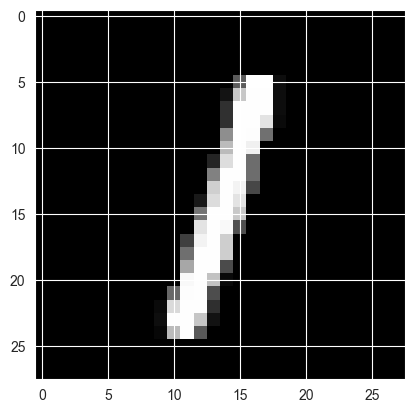

Prediction:  [6]
Label:  6


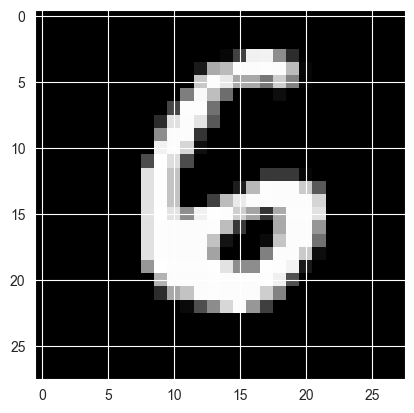

Prediction:  [9]
Label:  9


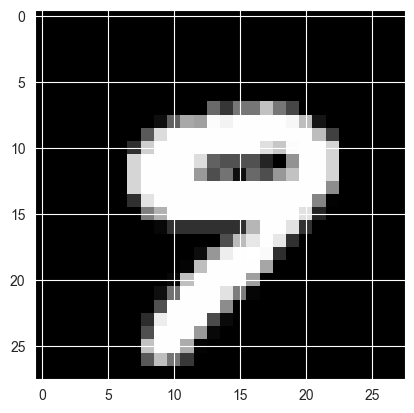

Prediction:  [8]
Label:  8


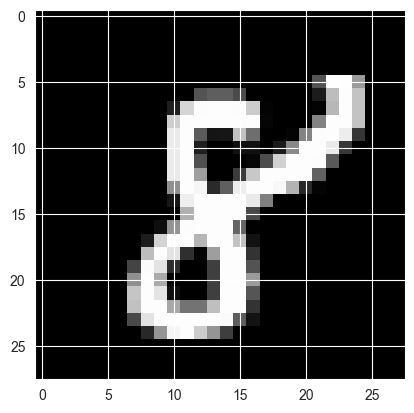

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(29, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 9 1 4 1 3 0 0 6 1 6 7 0 7 9 5 7 9 1 7 8 0 4 7 4 1 7 8 5 2 1 7 2 0 6 3 5
 1 9 1 2 0 8 0 2 2 6 8 2 7 5 4 6 1 8 1 2 8 6 8 8 8 4 4 8 6 9 9 1 8 1 0 4 6
 6 0 1 6 6 7 3 3 0 5 9 1 7 4 6 4 3 9 2 3 0 7 0 6 4 2 7 5 5 7 8 5 2 6 0 4 7
 4 2 3 8 5 2 7 6 6 3 9 9 6 0 7 1 2 6 5 9 7 8 5 3 1 0 3 2 7 4 7 8 9 8 2 3 2
 9 5 8 2 1 5 3 5 9 0 1 9 7 5 3 9 6 5 7 5 2 4 2 9 3 2 4 0 5 1 1 0 0 1 8 5 3
 9 2 0 6 1 3 8 4 4 6 0 4 7 2 9 7 3 6 3 2 4 3 2 3 3 1 1 7 7 0 3 5 8 5 0 3 2
 9 0 4 0 9 0 3 9 9 6 5 2 3 7 7 2 0 8 1 4 6 2 2 3 7 1 9 2 9 9 6 7 9 7 9 8 0
 5 0 9 0 8 0 1 9 7 0 9 7 4 9 7 1 3 7 5 2 1 1 6 6 5 1 7 3 2 4 6 3 7 8 3 6 7
 7 3 4 6 6 9 3 7 0 5 7 5 2 6 1 1 3 8 8 9 7 0 1 3 4 5 7 4 2 6 4 9 1 2 2 8 1
 3 6 5 4 6 7 4 2 8 6 9 2 3 7 9 7 5 1 2 7 0 8 4 2 8 4 5 9 5 6 7 5 2 7 7 9 0
 2 0 5 4 1 1 5 5 0 2 1 0 8 9 4 6 1 3 6 0 1 7 6 3 0 7 5 1 0 1 9 9 1 7 1 3 1
 0 8 6 5 7 2 4 6 0 8 1 4 5 7 2 0 4 9 4 2 0 2 5 2 2 9 0 8 7 1 3 8 8 8 4 5 9
 0 9 9 0 2 0 7 9 7 9 5 2 1 2 7 0 5 6 6 1 3 6 5 2 4 9 3 5 6 3 1 2 8 5 8 8 6
 8 7 9 1 6 8 5 1 9 5 3 8 

0.925

In [12]:
W1, b1, W2, b2

(array([[ 0.21126914,  0.16082464, -0.26243442, ...,  0.33335116,
         -0.29097371, -0.04232909],
        [-0.12225256, -0.15013914, -0.08921211, ..., -0.24435557,
          0.36925726,  0.27303929],
        [ 0.48652575,  0.10018452, -0.10837628, ...,  0.33420582,
         -0.34490888, -0.44371152],
        ...,
        [-0.07888443,  0.30827993, -0.1300029 , ...,  0.40414107,
          0.03397216,  0.13832164],
        [ 0.30246858, -0.05070216, -0.24902384, ..., -0.06493275,
          0.0312158 , -0.16631427],
        [-0.4143292 ,  0.05678325,  0.3647425 , ..., -0.0392367 ,
          0.43638554,  0.3511399 ]]),
 array([[ 0.06023514],
        [-0.11481957],
        [ 0.42285005],
        [ 0.54959602],
        [ 0.7166752 ],
        [-0.0713315 ],
        [-0.06713289],
        [ 0.81354275],
        [ 0.50346701],
        [ 0.39055144]]),
 array([[-0.47162905, -0.53678051,  0.30224444, -0.18930805,  0.18600403,
         -0.05164431,  0.90581929, -0.50562902,  0.18411631, -0.579